In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a practice set of random latitude and longitude combinations.
#x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
#y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
#coordinates = zip(x, y)

In [6]:
#Create a list for holding the cities
cities = []

#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count
len(cities)

610

In [7]:
#Import dependencies
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
#Create an empty list to hold the weather data
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 toS the record count
    record_count += 1

    ### Code Breakdown ###
    #Create a for loop with the enumerate() method and reference the index and the city in the list
    #Check if the remainder of the index divided by 50 is equal to zero, AND if the index is greater than or equal to 50,
    # using a conditional statement.
    #Create a URL endpoint in the conditional statement. However, we are removing blank spaces in the city name and 
    # concatenating the city name using city.replace(" ","+"). This will find the corresponding weather data for the city
    # instead of finding the weather data for the first part of the city name.
    #Add a print statement that tells the record count, set count, and the city that is being processed
    #Then add 1 to the record count before the next city is processed

#Run an API request for each of the cites 
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({'City': city.title(),
                          'Lat': city_lat, 
                          'Lng': city_lng, 
                          'Max Temp': city_max_temp, 
                          'Humidity': city_humidity, 
                          'Cloudiness': city_clouds, 
                          'Wind Speed': city_wind, 
                          'Country': city_country, 
                          'Date': city_date})
#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that the Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | korla
Processing Record 3 of Set 1 | mahebourg
Processing Record 4 of Set 1 | victoria
Processing Record 5 of Set 1 | mahajanga
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | vostok
Processing Record 8 of Set 1 | saint pete beach
Processing Record 9 of Set 1 | bengkulu
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | chisec
Processing Record 12 of Set 1 | kalanwali
Processing Record 13 of Set 1 | tuktoyaktuk
Processing Record 14 of Set 1 | khatanga
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | mgandu
Processing Record 20 of Set 1 | kobryn
Processing Record 21 of Set 1 | sao joao da barra
Processing Record 22 of Set 1 | benxi
Proc

Processing Record 39 of Set 4 | ntungamo
Processing Record 40 of Set 4 | krasnyy yar
Processing Record 41 of Set 4 | yulara
Processing Record 42 of Set 4 | raga
Processing Record 43 of Set 4 | mitsamiouli
Processing Record 44 of Set 4 | sitka
Processing Record 45 of Set 4 | hamilton
Processing Record 46 of Set 4 | shimoda
Processing Record 47 of Set 4 | kisangani
Processing Record 48 of Set 4 | vao
Processing Record 49 of Set 4 | gimli
Processing Record 50 of Set 4 | avera
Processing Record 1 of Set 5 | bilma
Processing Record 2 of Set 5 | rayong
Processing Record 3 of Set 5 | eyl
Processing Record 4 of Set 5 | warqla
City not found. Skipping...
Processing Record 5 of Set 5 | nantucket
Processing Record 6 of Set 5 | port hedland
Processing Record 7 of Set 5 | vikhorevka
Processing Record 8 of Set 5 | udachnyy
Processing Record 9 of Set 5 | kyshtovka
Processing Record 10 of Set 5 | oktyabrskoye
Processing Record 11 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 12 

Processing Record 25 of Set 8 | touros
Processing Record 26 of Set 8 | karratha
Processing Record 27 of Set 8 | sao miguel do araguaia
Processing Record 28 of Set 8 | vila do maio
Processing Record 29 of Set 8 | yar-sale
Processing Record 30 of Set 8 | port hawkesbury
Processing Record 31 of Set 8 | lata
Processing Record 32 of Set 8 | ust-uda
Processing Record 33 of Set 8 | caraballeda
Processing Record 34 of Set 8 | paka
Processing Record 35 of Set 8 | lalibela
Processing Record 36 of Set 8 | berlevag
Processing Record 37 of Set 8 | wanning
Processing Record 38 of Set 8 | yermakovskoye
Processing Record 39 of Set 8 | vilyuysk
Processing Record 40 of Set 8 | alta
Processing Record 41 of Set 8 | bonavista
Processing Record 42 of Set 8 | darnah
Processing Record 43 of Set 8 | lukovetskiy
Processing Record 44 of Set 8 | jiaozuo
Processing Record 45 of Set 8 | anadyr
Processing Record 46 of Set 8 | georgiyevskoye
Processing Record 47 of Set 8 | tenenkou
Processing Record 48 of Set 8 | sam

Processing Record 15 of Set 12 | uzhur
Processing Record 16 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 17 of Set 12 | birjand
Processing Record 18 of Set 12 | sambava
Processing Record 19 of Set 12 | ventimiglia
Processing Record 20 of Set 12 | belorechensk
Processing Record 21 of Set 12 | qui nhon
Processing Record 22 of Set 12 | ongandjera
Processing Record 23 of Set 12 | ubon ratchathani
Processing Record 24 of Set 12 | albi
Processing Record 25 of Set 12 | kandrian
Processing Record 26 of Set 12 | erdemli
Processing Record 27 of Set 12 | mestia
Processing Record 28 of Set 12 | sorvag
City not found. Skipping...
Processing Record 29 of Set 12 | mussomeli
Processing Record 30 of Set 12 | svetlaya
Processing Record 31 of Set 12 | mwene-ditu
Processing Record 32 of Set 12 | chiredzi
Processing Record 33 of Set 12 | altamira
Processing Record 34 of Set 12 | vangaindrano
Processing Record 35 of Set 12 | tomatlan
Processing Record 36 of Set 12 | jinka
Processing Re

In [9]:
len(city_data)

562

In [10]:
#Convert the array of dictionaries into a Pandas data frame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,78.10,72,47,16.60,PF,2022-04-16 17:00:22
1,Korla,41.7597,86.1469,53.26,12,0,3.29,CN,2022-04-16 17:01:43
2,Mahebourg,-20.4081,57.7000,77.29,78,40,10.36,MU,2022-04-16 17:01:43
3,Victoria,22.2855,114.1577,72.18,76,98,15.01,HK,2022-04-16 17:01:24
4,Mahajanga,-15.7167,46.3167,84.56,64,0,7.11,MG,2022-04-16 17:01:44
5,Port Elizabeth,-33.9180,25.5701,62.89,75,0,5.75,ZA,2022-04-16 16:58:42
6,Vostok,46.4856,135.8833,26.02,91,94,5.55,RU,2022-04-16 17:01:44
7,Saint Pete Beach,27.7253,-82.7412,88.25,68,0,5.01,US,2022-04-16 17:01:44
8,Bengkulu,-3.8004,102.2655,77.76,88,91,4.12,ID,2022-04-16 17:01:45
9,Vaini,-21.2000,-175.2000,81.21,67,98,12.30,TO,2022-04-16 17:00:34


In [11]:
#Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-04-16 17:00:22,-23.1203,-134.9692,78.10,72,47,16.60
1,Korla,CN,2022-04-16 17:01:43,41.7597,86.1469,53.26,12,0,3.29
2,Mahebourg,MU,2022-04-16 17:01:43,-20.4081,57.7000,77.29,78,40,10.36
3,Victoria,HK,2022-04-16 17:01:24,22.2855,114.1577,72.18,76,98,15.01
4,Mahajanga,MG,2022-04-16 17:01:44,-15.7167,46.3167,84.56,64,0,7.11
5,Port Elizabeth,ZA,2022-04-16 16:58:42,-33.9180,25.5701,62.89,75,0,5.75
6,Vostok,RU,2022-04-16 17:01:44,46.4856,135.8833,26.02,91,94,5.55
7,Saint Pete Beach,US,2022-04-16 17:01:44,27.7253,-82.7412,88.25,68,0,5.01
8,Bengkulu,ID,2022-04-16 17:01:45,-3.8004,102.2655,77.76,88,91,4.12
9,Vaini,TO,2022-04-16 17:00:34,-21.2000,-175.2000,81.21,67,98,12.30


In [12]:
#Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

#Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.
import time
# Get today's date in seconds.
today =  time.strftime("%x")
today

'04/16/22'

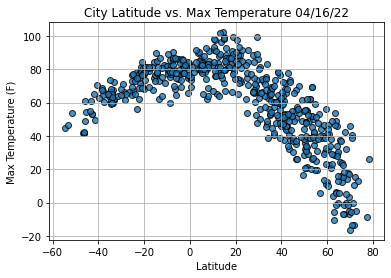

In [15]:
#Import time module
import time

#Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, 
            max_temps, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature '+ time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('weather_data/Fig1.png')

#Show plot
plt.show()

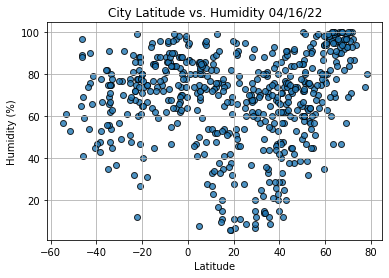

In [16]:
#Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity '+ time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('weather_data/Fig2.png')

#Show plot
plt.show()

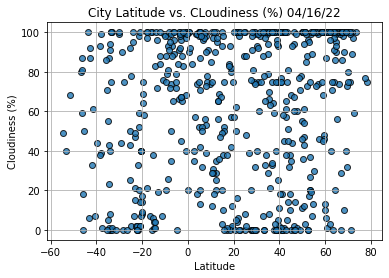

In [17]:
#Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. CLoudiness (%) '+ time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('weather_data/Fig3.png')

#Show plot
plt.show()

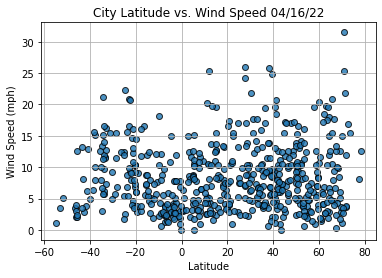

In [18]:
#Build the scatter plot for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed '+ time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

#Save the figure
plt.savefig('weather_data/Fig4.png')

#Show plot
plt.show()

In [19]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [20]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

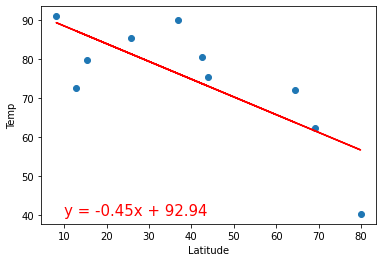

In [21]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [22]:

#Import linregress
from scipy.stats import linregress

#Create a function to perform linear regression on the weather data and plot a regression line with the equation
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    #Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " +str(round(intercept,2))
    
    #Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    #Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4      False
       ...  
557     True
558     True
559     True
560     True
561     True
Name: Lat, Length: 562, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Korla,CN,2022-04-16 17:01:43,41.7597,86.1469,53.26,12,0,3.29
3,Victoria,HK,2022-04-16 17:01:24,22.2855,114.1577,72.18,76,98,15.01
6,Vostok,RU,2022-04-16 17:01:44,46.4856,135.8833,26.02,91,94,5.55
7,Saint Pete Beach,US,2022-04-16 17:01:44,27.7253,-82.7412,88.25,68,0,5.01
10,Chisec,GT,2022-04-16 17:01:45,15.8167,-90.2833,88.59,54,52,3.44
...,...,...,...,...,...,...,...,...,...
557,Hami,CN,2022-04-16 17:04:38,42.8000,93.4500,53.17,20,0,7.63
558,Banepa,NP,2022-04-16 17:04:39,27.6298,85.5214,66.52,37,20,2.30
559,Virginia Beach,US,2022-04-16 17:04:39,36.8529,-75.9780,70.02,70,100,9.22
560,Parabel,RU,2022-04-16 17:04:39,58.6978,81.4825,46.72,80,100,10.31


In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Korla,CN,2022-04-16 17:01:43,41.7597,86.1469,53.26,12,0,3.29
3,Victoria,HK,2022-04-16 17:01:24,22.2855,114.1577,72.18,76,98,15.01
6,Vostok,RU,2022-04-16 17:01:44,46.4856,135.8833,26.02,91,94,5.55
7,Saint Pete Beach,US,2022-04-16 17:01:44,27.7253,-82.7412,88.25,68,0,5.01
10,Chisec,GT,2022-04-16 17:01:45,15.8167,-90.2833,88.59,54,52,3.44


In [26]:
#Create Northern and Southern Hemisphere data frames
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Korla,CN,2022-04-16 17:01:43,41.7597,86.1469,53.26,12,0,3.29
3,Victoria,HK,2022-04-16 17:01:24,22.2855,114.1577,72.18,76,98,15.01
6,Vostok,RU,2022-04-16 17:01:44,46.4856,135.8833,26.02,91,94,5.55
7,Saint Pete Beach,US,2022-04-16 17:01:44,27.7253,-82.7412,88.25,68,0,5.01
10,Chisec,GT,2022-04-16 17:01:45,15.8167,-90.2833,88.59,54,52,3.44


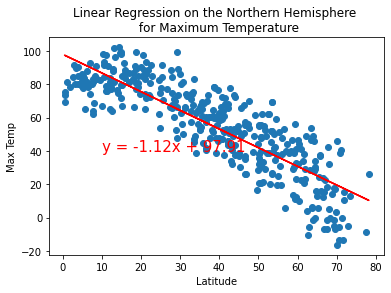

In [27]:
#Linear regression on the Northern Hemisphere (Max Temp) [6.4.2]
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp', (10,40))

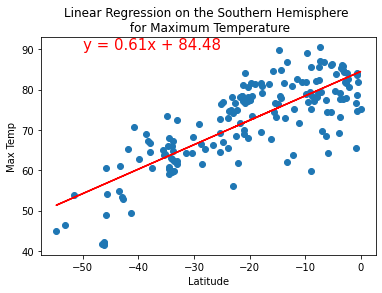

In [29]:
#Linear regression on the Southern Hemisphere 
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp', (-50,90))

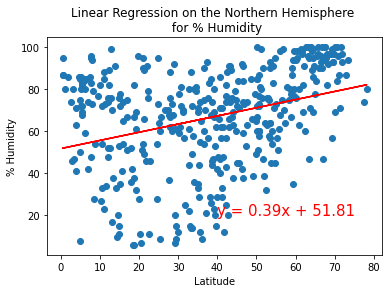

In [30]:
#Linear regression on the Northern Hemisphere 
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity', (40,20))

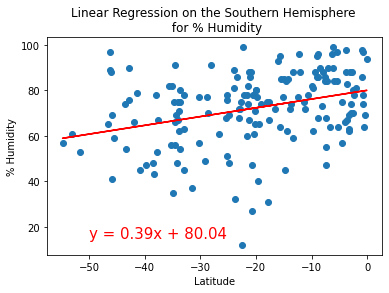

In [31]:
#Linear regression on the Southern Hemisphere 
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity', (-50,15))

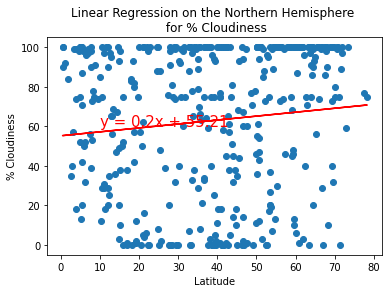

In [32]:
#Linear regression on the Northern Hemisphere 
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness', (10,60))


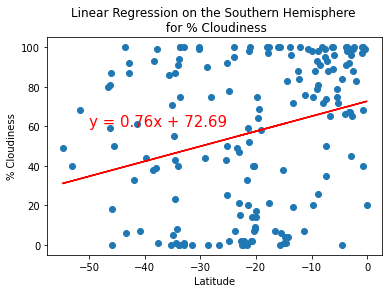

In [33]:
#Linear regression on the Southern Hemisphere 
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness', (-50,60))

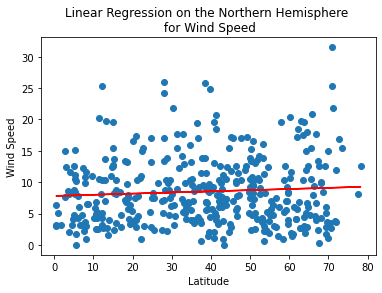

In [34]:
#Linear regression on the Northern Hemisphere 
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed', (40,35))

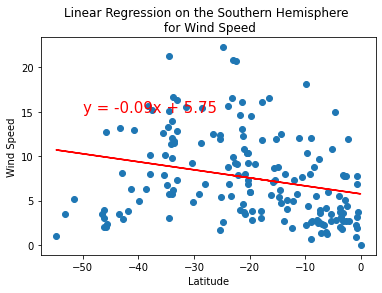

In [35]:
#Linear regression on the Southern Hemisphere 
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed', (-50,15))